In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import glob

In [7]:
data_dir = 'C:/CDT/Rainfall_Climatology/CHIRPSv2_monthly/Extracted/CHIRPSv2_monthly/'
may_files = sorted(glob.glob(data_dir + 'chirps_????05.nc'))


In [12]:
may_rainfall = xr.open_mfdataset(may_files, combine='by_coords',decode_times=False)
print(may_rainfall)

<xarray.Dataset>
Dimensions:        (X: 611, Y: 712, T: 43)
Coordinates:
  * X              (X) float32 21.5 21.55 21.6 21.65 ... 51.85 51.9 51.95 52.0
  * Y              (Y) float32 -12.02 -11.97 -11.92 -11.88 ... 23.42 23.47 23.52
  * T              (T) float32 256.5 268.5 280.5 292.5 ... 736.5 748.5 760.5
Data variables:
    precipitation  (T, Y, X) float32 dask.array<chunksize=(1, 712, 611), meta=np.ndarray>


In [13]:
may_rainfall_avg = may_rainfall.mean(dim='T')

In [22]:
import geopandas as gpd

In [23]:
shapefile_path = ("C:/CDT/GHA.shp")
shapefile = gpd.read_file("C:/CDT/GHA.shp")

In [27]:
from matplotlib.colors import ListedColormap

In [63]:
colors = [ "#D3D3D3","#FFA500","#FFFF00","#ADFF2F", "#98FB98", "#00FF00","#006400"]

#'#D3D3D3', '#FFA500', '#FFFF00',THAT IS YELLOW '#ADFF2F', '#00FF00', '#006400'

icpac_cmap = ListedColormap(colors)

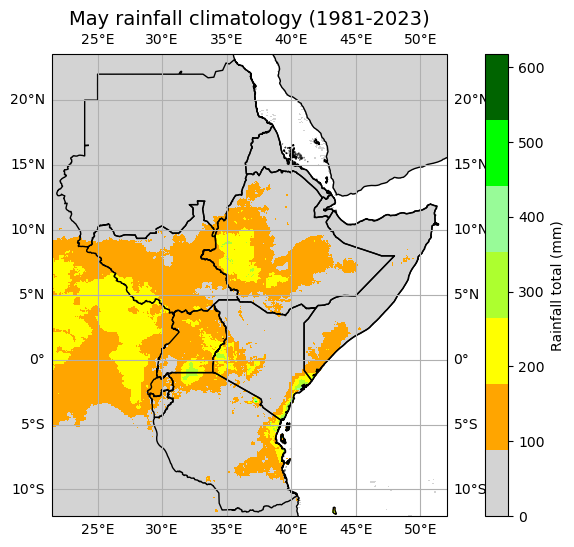

In [64]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
rain_plot = may_rainfall_avg['precipitation'].plot(
    ax=ax, 
    transform=ccrs.PlateCarree(), 
    cmap=icpac_cmap,
    
    cbar_kwargs={'label': 'Rainfall total (mm)'}
)
ax.coastlines()
ax.gridlines(draw_labels=True)
plt.title('May rainfall climatology (1981-2023)', fontsize=14)
shapefile.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)
plt.show()